## DataFrame Basics


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
myseries = pd.Series([10,20,30])
print(myseries)


0    10
1    20
2    30
dtype: int64


In [4]:
print(myseries.is_unique)

True


In [5]:
df = pd.DataFrame({
    "Name": ["Arjit","Midoriya","Taisen"],
    "Age": [24,21,19]
})
print(df)

       Name  Age
0     Arjit   24
1  Midoriya   21
2    Taisen   19


In [6]:
# Reading from a csv file
sales = pd.read_csv("sales.csv")
print(sales.head())

   product_code product_group  stock_qty    cost    price  last_week_sales  \
0          4187           PG2        498  420.76   569.91               13   
1          4195           PG2        473  545.64   712.41               16   
2          4204           PG2        968  640.42   854.91               22   
3          4219           PG2        241  869.69  1034.55               14   
4          4718           PG2       1401   12.54    26.59               50   

   last_month_sales  
0                58  
1                58  
2                88  
3                45  
4               285  


In [7]:
# Read only particular columns and only 30 rows
sales = pd.read_csv("sales.csv", usecols=["product_code","product_group","stock_qty"], nrows= 10)
print(sales)

   product_code product_group  stock_qty
0          4187           PG2        498
1          4195           PG2        473
2          4204           PG2        968
3          4219           PG2        241
4          4718           PG2       1401
5          5630           PG4        287
6          5631           PG4        262
7          5634           PG4        205
8          2650           PG4        239
9          5647           PG4        352


In [8]:
# Important methods 
print(sales.shape) # Return rows*columns
print(sales.size) 
print(len(sales)) # Return rows
print(sales["stock_qty"].min()) # Minimum in stock_qty column
print(sales["stock_qty"].max()) # Maximum in stock_qty column

(10, 3)
30
10
205
1401


In [9]:
print(sales.dtypes)

product_code      int64
product_group    object
stock_qty         int64
dtype: object


In [10]:
print(sales.columns)
print(list(sales.columns))

Index(['product_code', 'product_group', 'stock_qty'], dtype='object')
['product_code', 'product_group', 'stock_qty']


In [11]:
# Changing type of a column
sales['stock_qty'] = sales['stock_qty'].astype("float")
sales.dtypes

# Changing data type of multiple columns
# sales = sales.astype({
#    "stock_qty": "float",
#    "product_code": "float"
# })

product_code       int64
product_group     object
stock_qty        float64
dtype: object

In [12]:
# Finding distinct values in a column
sales = pd.read_csv("sales.csv")
print(sales["product_group"].nunique()) # Returns number of unique values in this column
print(sales["product_group"].unique()) # Shows all the unique values that exist in this column
print(sales["product_group"].value_counts()) # Shows all the unique values along with their frequency

6
['PG2' 'PG4' 'PG6' 'PG5' 'PG3' 'PG1']
PG4    349
PG5    255
PG6    243
PG2     75
PG3     39
PG1     39
Name: product_group, dtype: int64


## Filtering

In [13]:
# loc uses row and column labels.
# iloc uses row and column indexes.
sales = pd.read_csv("sales.csv")
print(sales.head())

   product_code product_group  stock_qty    cost    price  last_week_sales  \
0          4187           PG2        498  420.76   569.91               13   
1          4195           PG2        473  545.64   712.41               16   
2          4204           PG2        968  640.42   854.91               22   
3          4219           PG2        241  869.69  1034.55               14   
4          4718           PG2       1401   12.54    26.59               50   

   last_month_sales  
0                58  
1                58  
2                88  
3                45  
4               285  


In [14]:
print(sales.loc[:4, ["product_code","product_group"]]) # Select first 5 rows and 2 columns

   product_code product_group
0          4187           PG2
1          4195           PG2
2          4204           PG2
3          4219           PG2
4          4718           PG2


In [15]:
print(sales.iloc[:5, [0,1]]) # Select first 5 rows and first 2 columns

   product_code product_group
0          4187           PG2
1          4195           PG2
2          4204           PG2
3          4219           PG2
4          4718           PG2


In [16]:
# Selecting subset of columns
selected_columns = ["product_code","price"]
print(sales[selected_columns].head())
# print(sales[["product_code","price"]].head())

   product_code    price
0          4187   569.91
1          4195   712.41
2          4204   854.91
3          4219  1034.55
4          4718    26.59


In [17]:
# Filtering based on a condition
sales_filtered = sales[sales["product_group"] == "PG2"]
# sales_filtered = sales[sales.product_group == "PG2"]
print(sales_filtered.head())

   product_code product_group  stock_qty    cost    price  last_week_sales  \
0          4187           PG2        498  420.76   569.91               13   
1          4195           PG2        473  545.64   712.41               16   
2          4204           PG2        968  640.42   854.91               22   
3          4219           PG2        241  869.69  1034.55               14   
4          4718           PG2       1401   12.54    26.59               50   

   last_month_sales  
0                58  
1                58  
2                88  
3                45  
4               285  


In [18]:
print(sales[sales["price"] > 100].head())

   product_code product_group  stock_qty    cost    price  last_week_sales  \
0          4187           PG2        498  420.76   569.91               13   
1          4195           PG2        473  545.64   712.41               16   
2          4204           PG2        968  640.42   854.91               22   
3          4219           PG2        241  869.69  1034.55               14   
8          2650           PG4        239   59.40   111.06               15   

   last_month_sales  
0                58  
1                58  
2                88  
3                45  
8                38  


In [19]:
# Filtering based on Multiple conditions 
sales_filtered = sales[(sales["price"] > 100) & (sales["stock_qty"] < 400) ] # & is AND, while | is OR
print(sales_filtered[["price","stock_qty"]].head())

       price  stock_qty
3    1034.55        241
8     111.06        239
165   208.91        244
186   427.41        369
199   104.49        144


In [20]:
# isin method 
sales_filtered = sales[sales["product_group"].isin(["PG1","PG2","PG3"])]

In [21]:
# Query Function : Allows textual queries
sales_filtered = sales.query("price > 100 and stock_qty < 400")

## String Manipulation

In [22]:
staff = pd.read_csv("staff.csv")
print(staff.head(5))

               name             city date_of_birth  start_date   salary  \
0          John Doe      Houston, TX    1998-11-04  2018-08-11  $65,000   
1          Jane Doe     San Jose, CA    1995-08-05  2017-08-24  $70,000   
2        Matt smith       Dallas, TX    1996-11-25  2020-04-16  $58,500   
3     Ashley Harris        Miami, FL    1995-01-08  2021-02-11  $49,500   
4  Jonathan targett  Santa Clara, CA    1998-08-14  2020-09-01  $62,000   

        department  
0       Accounting  
1    Field Quality  
2  human resources  
3       accounting  
4    field quality  


In [23]:
# str[start : end : step size]
print(staff["name"].str[0:4])

0    John
1    Jane
2    Matt
3    Ashl
4    Jona
5    Hale
Name: name, dtype: object


In [24]:
# Splitting strings
print(staff["name"].str.split(" "))

0            [John, Doe]
1            [Jane, Doe]
2          [Matt, smith]
3       [Ashley, Harris]
4    [Jonathan, targett]
5           [Hale, Cole]
Name: name, dtype: object


In [25]:
staff["last_name"] = staff["name"].str.split(" ", expand=True)[1] # expand parameter creates seperated column after splitting
print(staff[["name","last_name"]])

               name last_name
0          John Doe       Doe
1          Jane Doe       Doe
2        Matt smith     smith
3     Ashley Harris    Harris
4  Jonathan targett   targett
5         Hale Cole      Cole


In [26]:
# Combining strings
print(staff["name"] + " - " + staff["department"])

0               John Doe - Accounting
1            Jane Doe - Field Quality
2        Matt smith - human resources
3          Ashley Harris - accounting
4    Jonathan targett - field quality
5             Hale Cole - engineering
dtype: object


In [27]:
# Uppercase and lowercase
print(staff["name"].str.lower())
print(staff["name"].str.upper())
print(staff["name"].str.capitalize())

0            john doe
1            jane doe
2          matt smith
3       ashley harris
4    jonathan targett
5           hale cole
Name: name, dtype: object
0            JOHN DOE
1            JANE DOE
2          MATT SMITH
3       ASHLEY HARRIS
4    JONATHAN TARGETT
5           HALE COLE
Name: name, dtype: object
0            John doe
1            Jane doe
2          Matt smith
3       Ashley harris
4    Jonathan targett
5           Hale cole
Name: name, dtype: object


In [28]:
# Replacing characters in a String
print(staff["city"].str.replace(",","-"))

0        Houston- TX
1       San Jose- CA
2         Dallas- TX
3          Miami- FL
4    Santa Clara- CA
5        Atlanta- GA
Name: city, dtype: object


In [29]:
# Chained operations
print(staff["city"].str.split(",", expand=True)[1].str.lower()) # From city column, take out state and lower case it

0     tx
1     ca
2     tx
3     fl
4     ca
5     ga
Name: 1, dtype: object


In [30]:
staff["department"].str.lower().replace("field quality","quality") # In department replace field quality values as quality

0         accounting
1            quality
2    human resources
3         accounting
4            quality
5        engineering
Name: department, dtype: object

In [31]:
staff["salary_cleaned"] = staff["salary"].str[1:].str.replace(",","") # Remove $ and comma from salary
staff["salary_cleaned"] = staff["salary_cleaned"].astype("int") # convert salary_cleaned to int
print(staff["salary_cleaned"])

0    65000
1    70000
2    58500
3    49500
4    62000
5    54500
Name: salary_cleaned, dtype: int32


## Date Manipulation

In [32]:
# datetime64[ns] and timedelta[ns] are commonly used datatypes
date1 = pd.to_datetime("2021-10-10")
date2 = pd.to_datetime("2021-10-02")

In [33]:
diff = date1 - date2 # differemce is calculated in terms of days. Timedelta objects have days attribute
print(diff)

8 days 00:00:00


In [34]:
mydate = pd.to_datetime("2021-10-10 14:30:00")

print(f"The year part is {mydate.year}")
print(f"The month part is {mydate.month}")
print(f"The week number part is {mydate.week}")
print(f"The day part is {mydate.day}")
print(f"The hour part is {mydate.hour}")
print(f"The minute part is {mydate.minute}")
print(f"The second part is {mydate.second}")
print(f"The date part is {mydate.date()}")
print(f"The day of week is {mydate.weekday()}")
print(f"The name of the month is {mydate.month_name()}")
print(f"The name of the day is {mydate.day_name()}")


The year part is 2021
The month part is 10
The week number part is 40
The day part is 10
The hour part is 14
The minute part is 30
The second part is 0
The date part is 2021-10-10
The day of week is 6
The name of the month is October
The name of the day is Sunday


In [35]:
# change data type of date columns
staff = staff.astype({
    "date_of_birth": "datetime64[ns]",
    "start_date": "datetime64[ns]",
})

In [36]:
# The dt accessor
staff["start_month"] = staff["start_date"].dt.month
print(staff[["start_date","start_month"]])

  start_date  start_month
0 2018-08-11            8
1 2017-08-24            8
2 2020-04-16            4
3 2021-02-11            2
4 2020-09-01            9
5 2021-10-20           10


In [37]:
print(staff["start_date"].dt.isocalendar())

   year  week  day
0  2018    32    6
1  2017    34    4
2  2020    16    4
3  2021     6    4
4  2020    36    2
5  2021    42    3


In [38]:
staff["raise_date"] = staff["start_date"] + pd.DateOffset(years=1) # add a year
# staff["raise_date"] = staff["start_date"] + pd.DateOffset(month=6)
print(staff[["start_date","raise_date"]])

  start_date raise_date
0 2018-08-11 2019-08-11
1 2017-08-24 2018-08-24
2 2020-04-16 2021-04-16
3 2021-02-11 2022-02-11
4 2020-09-01 2021-09-01
5 2021-10-20 2022-10-20


In [39]:
print(staff["start_date"] + pd.Timedelta(value=12, unit="W")) # add 12 weeks

0   2018-11-03
1   2017-11-16
2   2020-07-09
3   2021-05-06
4   2020-11-24
5   2022-01-12
Name: start_date, dtype: datetime64[ns]


In [40]:
(staff["start_date"] - staff["date_of_birth"]).dt.days / 365 # finding age when they joined company

0    19.780822
1    22.068493
2    23.405479
3    26.112329
4    22.065753
5    21.002740
dtype: float64

## Missing values
- Standard missing value representation in a DataFrame is NaN
- Not compatible with integer, so whenever there is NaN value in integer column, data type of whole column is upcasted to float, Solution to this is use ```pd.Int64Dtype()```

In [41]:
df = pd.DataFrame({
    "A": [1, 2, 3, np.nan],
    "B": [2.4, 6.2, 5.1, np.nan],
    "C": ["foo","zoo","bar", np.nan]
})

print("Before(Int upcasted to float) - \n",df)
df["A"] = df["A"].astype(pd.Int64Dtype())
print("After(Back to int) - \n",df)

Before(Int upcasted to float) - 
      A    B    C
0  1.0  2.4  foo
1  2.0  6.2  zoo
2  3.0  5.1  bar
3  NaN  NaN  NaN
After(Back to int) - 
       A    B    C
0     1  2.4  foo
1     2  6.2  zoo
2     3  5.1  bar
3  <NA>  NaN  NaN


In [42]:
# isna and notna functions
print("Grid of True & false \n", df.isna())


Grid of True & false 
        A      B      C
0  False  False  False
1  False  False  False
2  False  False  False
3   True   True   True


In [43]:
print(df.isna().sum()) # Number of missing Values in each column

A    1
B    1
C    1
dtype: int64


In [44]:
print(df.isna().sum().sum()) # Total number of missing values in the dataframe

3


In [45]:
# Dropping rows and columns 
df = pd.DataFrame({
    "A": [1, 2, 3, np.nan, 7],
    "B": [2.4, np.nan, 5.1, np.nan, 2.6],
    "C": [np.nan, "foo","zoo","bar", np.nan],
    "D": [11.5, np.nan, 6.2, 21.1, 8.7],
    "E": [1, 2, 3, 4, 5]
})

print("Before - \n", df)

# Drop rows that have at least one missing value
print("\nAfter dropping rows - \n\n",df.dropna(axis=0, how="any")) # axis=0 means drop rows, any means even if one column is NaN

# Drop columns that have at least one missing value
print("\nAfter dropping columns - \n\n",df.dropna(axis=1, how="any")) # axis=1 means drop columns, any means even if one column is NaN

# Drop rows that have less than 4 non missing columns(i.e = 5 column me se 4 thik hai unko rehnede baakio ko delte)
print("\nAfter dropping rows with less than 4 non-missing columns - \n\n",df.dropna(thresh=4)) # axis=1 means drop columns, any means even if one column is NaN

Before - 
      A    B    C     D  E
0  1.0  2.4  NaN  11.5  1
1  2.0  NaN  foo   NaN  2
2  3.0  5.1  zoo   6.2  3
3  NaN  NaN  bar  21.1  4
4  7.0  2.6  NaN   8.7  5

After dropping rows - 

      A    B    C    D  E
2  3.0  5.1  zoo  6.2  3

After dropping columns - 

    E
0  1
1  2
2  3
3  4
4  5

After dropping rows with less than 4 non-missing columns - 

      A    B    C     D  E
0  1.0  2.4  NaN  11.5  1
2  3.0  5.1  zoo   6.2  3
4  7.0  2.6  NaN   8.7  5


In [46]:

# inplace inorder to save the changes in df
df.dropna(thresh=4)
print("\nBefore inplace - \n",df)
df.dropna(thresh=4, inplace=True)
print("\nAfter inplace - \n",df)


Before inplace - 
      A    B    C     D  E
0  1.0  2.4  NaN  11.5  1
1  2.0  NaN  foo   NaN  2
2  3.0  5.1  zoo   6.2  3
3  NaN  NaN  bar  21.1  4
4  7.0  2.6  NaN   8.7  5

After inplace - 
      A    B    C     D  E
0  1.0  2.4  NaN  11.5  1
2  3.0  5.1  zoo   6.2  3
4  7.0  2.6  NaN   8.7  5


In [47]:
# Replacing Missing Values
df = pd.DataFrame({
    "A": [1, 2, 3, np.nan, 7],
    "B": [2.4, np.nan, 5.1, np.nan, 2.6],
    "C": [np.nan, "foo","zoo","bar", np.nan],
    "D": [11.5, np.nan, 6.2, 21.1, 8.7],
    "E": [1, 2, 3, 4, 5]
})
print("\nBefore fillna - \n",df["A"])
print("\nA column after fillna - \n")
print(df["A"].fillna(value = df["A"].mean()))
# print(df["A"].fillna(method="bfill")) # Replace missing values with what comes after it
# print(df["A"].fillna(method="ffill")) # Replace missing values with what comes before it


Before fillna - 
 0    1.0
1    2.0
2    3.0
3    NaN
4    7.0
Name: A, dtype: float64

A column after fillna - 

0    1.00
1    2.00
2    3.00
3    3.25
4    7.00
Name: A, dtype: float64


## Data Analyis

In [48]:
grocery = pd.read_csv("grocery.csv")

print(grocery.groupby("product_group").mean()) # Pandas calculates the mean value for all the numerical columns
print("\n")
print(grocery[["product_group","price"]].groupby("product_group").mean())

               product_code  price  sales_quantity
product_group                                     
clothing        1007.000000  10.99        5.000000
dairy           1003.000000   4.99        2.000000
electronics     1004.666667  72.33       15.166667
fruit           1002.000000   1.99       10.000000
software        1006.000000   0.99       20.000000
vegetable       1001.000000   2.99       33.750000


               price
product_group       
clothing       10.99
dairy           4.99
electronics    72.33
fruit           1.99
software        0.99
vegetable       2.99


In [49]:
# named aggregations
print(
    grocery.groupby("product_group").agg(
    avg_price=("price","mean")
    )
)

               avg_price
product_group           
clothing           10.99
dairy               4.99
electronics        72.33
fruit               1.99
software            0.99
vegetable           2.99


In [50]:
# multiple named aggregations
print(
  grocery.groupby("product_group").agg(
    avg_price = ("price","mean"),
    total_sales = ("sales_quantity", "sum")
  )
)

               avg_price  total_sales
product_group                        
clothing           10.99            5
dairy               4.99            6
electronics        72.33           91
fruit               1.99           30
software            0.99           60
vegetable           2.99          135


In [51]:
# sort_values function
print(
  grocery.groupby("product_description").agg(
    avg_price = ("price","mean"),
    total_sales = ("sales_quantity", "sum")
  ).sort_values(
    by="total_sales",
    ascending=False
  )
)

                     avg_price  total_sales
product_description                        
tomato                    2.99          135
headphone                12.99           72
antivirus                 0.99           60
banana                    1.99           30
laptop                  102.00           19
milk                      4.99            6
Jeans                    10.99            5


In [52]:
# Pivot Table - 
# pivot table to see the yearly total sales quantities of the product groups
grocery["sales_date"] = grocery["sales_date"].astype("datetime64[ns]")
grocery["year"] = grocery["sales_date"].dt.year 
print(
    pd.pivot_table(
    data=grocery,
    values="sales_quantity",
    index="product_group",
    columns="year",
    aggfunc="sum"
    )
)
'''
data: The name of the DataFrame
values: The column that contains the values to be aggregated in the pivot table
index: The rows of the pivot table
columns: The columns of the pivot table
aggfunc: The function used to aggregate the values
'''

year            2021  2022  2023
product_group                   
clothing         NaN   NaN   5.0
dairy            NaN   6.0   NaN
electronics      NaN  91.0   NaN
fruit           30.0   NaN   NaN
software         NaN   NaN  60.0
vegetable      135.0   NaN   NaN


'\ndata: The name of the DataFrame\nvalues: The column that contains the values to be aggregated in the pivot table\nindex: The rows of the pivot table\ncolumns: The columns of the pivot table\naggfunc: The function used to aggregate the values\n'

In [53]:
# Show rows and columns total in pivot table
print(
    pd.pivot_table(
    data=grocery,
    values="sales_quantity",
    index="product_group",
    columns="year",
    aggfunc="sum",
    margins=True,
    margins_name= "Total"
    )
)

year            2021  2022  2023  Total
product_group                          
clothing         NaN   NaN   5.0      5
dairy            NaN   6.0   NaN      6
electronics      NaN  91.0   NaN     91
fruit           30.0   NaN   NaN     30
software         NaN   NaN  60.0     60
vegetable      135.0   NaN   NaN    135
Total          165.0  97.0  65.0    327


In [54]:
# cut and qcut functions - convert columns with continuous values to categorical columns
# cut function - divides value range into bins of equal size
A = pd.Series([5, 0, 2, 8, 4, 10, 7])
A_binned = pd.cut(A, bins=4)
print(A_binned)

0      (2.5, 5.0]
1    (-0.01, 2.5]
2    (-0.01, 2.5]
3     (7.5, 10.0]
4      (2.5, 5.0]
5     (7.5, 10.0]
6      (5.0, 7.5]
dtype: category
Categories (4, interval[float64, right]): [(-0.01, 2.5] < (2.5, 5.0] < (5.0, 7.5] < (7.5, 10.0]]


In [55]:
# manual bin range in cut
A_binned = pd.cut(A, bins=[-1, 3, 6, 10], labels=["small","medium","large"])
print(A_binned)

0    medium
1     small
2     small
3     large
4    medium
5     large
6     large
dtype: category
Categories (3, object): ['small' < 'medium' < 'large']


In [56]:
#qcut - focus on number of values that fall into bins
A = pd.Series([1, 4, 2, 10, 5, 6, 8, 7, 5, 3, 5, 9])
A_binned = pd.qcut(A, q=3)
print(A_binned.value_counts())

(0.999, 4.667]    4
(4.667, 6.333]    4
(6.333, 10.0]     4
dtype: int64


In [57]:
# Manual quantile to be kept in a bin in qcut
A = pd.Series([1, 4, 2, 3, 10, 5, 6, 8, 7, 5, 9, 14])
A_binned = pd.qcut(A, q=[0, 0.50, 0.75, 1]) # smallest 50% in bin1, from 50% to 75% in bin2 and rest in last bin
print(A_binned.value_counts())

(0.999, 5.5]    6
(5.5, 8.25]     3
(8.25, 14.0]    3
dtype: int64


In [58]:
# where clause
# Increase price of grocery by 10% which are less than $3
grocery["price_updated"] = grocery["price"].where(
  grocery["price"] >= 3,
  other = grocery["price"] * 1.1
)
print(grocery[grocery["price"] < 3][["price","price_updated"]].head()) 
print(grocery[grocery["price"] > 3][["price","price_updated"]].head())


   price  price_updated
1   2.99          3.289
2   2.99          3.289
3   2.99          3.289
4   2.99          3.289
5   1.99          2.189
    price  price_updated
8    4.99           4.99
9    4.99           4.99
10   4.99           4.99
11  12.99          12.99
12  12.99          12.99


## Data Visualization

'\ngrocery["price"].plot(\n    kind = "hist",\n    figsize = (10, 6),\n    title = "Histogram of grocery prices",\n    xticks = [2,3,4,5,6,7,8,9,10,11,12]\n)\n'

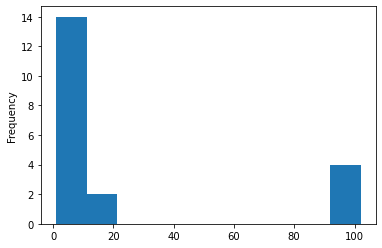

In [59]:
# histogram
grocery["price"].plot(kind="hist")
'''
grocery["price"].plot(
    kind = "hist",
    figsize = (10, 6),
    title = "Histogram of grocery prices",
    xticks = [2,3,4,5,6,7,8,9,10,11,12]
)
'''

<AxesSubplot:title={'center':'Daily tomato sales'}, xlabel='sales_date'>

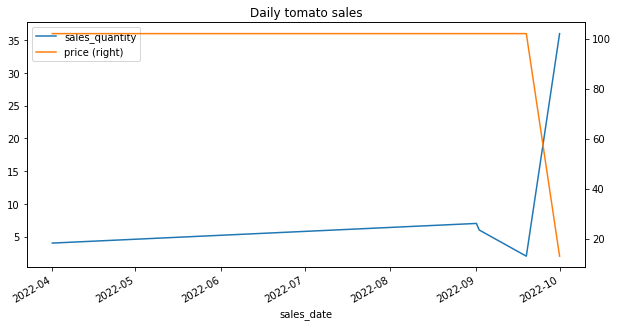

In [60]:
# line plot
grocery[grocery["product_group"]=="electronics"].plot(
    x = "sales_date", 
    y = ["sales_quantity","price"],
    kind = "line",
    figsize = (10,5),
    title = "Daily tomato sales",
    secondary_y = "price"
    #xlabel = "Sales date",
    #ylabel = "Sales quantity"
)

<AxesSubplot:title={'center':'Cost vs Price'}, xlabel='price', ylabel='cost'>

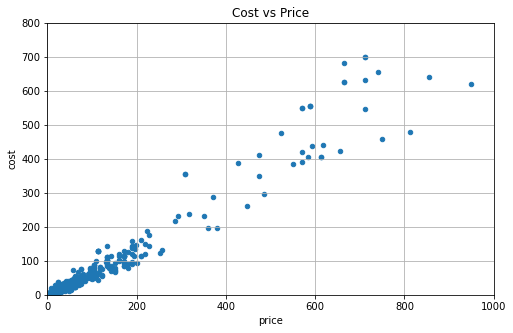

In [61]:
# scatter plot
sales.plot(
    x = "price",
    y = "cost",
    kind = "scatter",
    figsize = (8, 5),
    title = "Cost vs Price",
    xlim = (0, 1000),
    ylim = (0, 800),
    grid = True
)


## Combining Dataframes

In [62]:
# Concat Function
# Join with common columns
df1 = pd.DataFrame({"A":[1,5,3,2], "B":[11,6,9,6], "C":["a","d","f","b"]})
df2 = pd.DataFrame({"A":[2,4,1,7], "B":[14,9,5,8], "C":["b","b","j","a"]})
# df_combined = pd.concat([df1, df2], axis=0)
df_combined = pd.concat([df1, df2], axis=0, ignore_index=True)
print(df_combined)

   A   B  C
0  1  11  a
1  5   6  d
2  3   9  f
3  2   6  b
4  2  14  b
5  4   9  b
6  1   5  j
7  7   8  a


In [63]:
# inner join
df1 = pd.DataFrame({"A":[1,5,3,2], "B":[11,6,9,6], "C":["a","d","f","b"]})
df2 = pd.DataFrame({"A":[2,4,1,7], "B":[14,9,5,8], "D":["b","b","j","a"]})
df_combined = pd.concat([df1, df2], join="inner", ignore_index=True)
print(df_combined)

   A   B
0  1  11
1  5   6
2  3   9
3  2   6
4  2  14
5  4   9
6  1   5
7  7   8


In [64]:
# Join with common row indexes
df1 = pd.DataFrame({"A":[1,5,3,2], "B":[11,6,9,6], "C":["a","d","f","b"]})
df2 = pd.DataFrame({"A":[2,4,1,7], "B":[14,9,5,8], "D":["b","b","j","a"]})
df_combined = pd.concat([df1, df2], axis=1)
print(df_combined)

   A   B  C  A   B  D
0  1  11  a  2  14  b
1  5   6  d  4   9  b
2  3   9  f  1   5  j
3  2   6  b  7   8  a


In [65]:
# Merge Function
product = pd.DataFrame({
  "product_code": [1001, 1002, 1003, 1004],
  "weight": [125, 200, 100, 400],
  "price": [10.5, 24.5, 9.9, 34.5]
})
sales = pd.DataFrame({
  "product_code": [1001, 1002, 1003, 1007],
  "sales_date": ["2021-12-10"] * 4,
  "sales_qty": [8, 14, 22, 7]
})
# merge DataFrames
merged_df = product.merge(sales, how="left", on="product_code") # left,inner and outer
print(merged_df)

   product_code  weight  price  sales_date  sales_qty
0          1001     125   10.5  2021-12-10        8.0
1          1002     200   24.5  2021-12-10       14.0
2          1003     100    9.9  2021-12-10       22.0
3          1004     400   34.5         NaN        NaN


## Improve Performance

- Export dataframe object to hdf,pickle or gbq file format for faster load times
- Use category type instead of object(Suppose we have country column, no matter how many million rows but there will be only certain few countries)
- Use Vectorize instead of iterrows when traversing the data

In [66]:
grocery.to_hdf("grocerydata.hdf", key="df")

## Feature Engineering
- Label Encoding : machine learning algorithm can only deal with numerical features, so we transform categorical data to numerical one.



In [67]:
df = pd.DataFrame({"col1": ["Sun", "Sun", "Moon", "Earth", "Monn", "Venus"]})
print("/n")

df["col1"] = df["col1"].astype("category") # convert type of col1 to category

df["col1_label_encoding"] = df["col1"].cat.codes # use categeory codes to make label encoding column

print(df)

/n
    col1  col1_label_encoding
0    Sun                    3
1    Sun                    3
2   Moon                    2
3  Earth                    0
4   Monn                    1
5  Venus                    4


- one-hot encoding: convert categorical value to 0 or 1 

In [68]:
df = pd.DataFrame({"col1": ["Sun", "Sun", "Moon", "Earth", "Moon", "Venus"]})
print(df)
print("/n")
#get_dummies function is used for on-hot encoding
df_new = pd.get_dummies(df, columns=["col1"], prefix="Planet")
print(df_new)

    col1
0    Sun
1    Sun
2   Moon
3  Earth
4   Moon
5  Venus
/n
   Planet_Earth  Planet_Moon  Planet_Sun  Planet_Venus
0             0            0           1             0
1             0            0           1             0
2             0            1           0             0
3             1            0           0             0
4             0            1           0             0
5             0            0           0             1


- count-encodings: uses the number of categories in the dataset as the new feature.

In [69]:

df = pd.DataFrame({"col1": ["Sun", "Sun", "Moon", "Earth", "Moon", "Venus"]})
print(df)
print("/n")
df["planet_count"] = df["col1"].map(df["col1"].value_counts().to_dict())
print(df)

    col1
0    Sun
1    Sun
2   Moon
3  Earth
4   Moon
5  Venus
/n
    col1  planet_count
0    Sun             2
1    Sun             2
2   Moon             2
3  Earth             1
4   Moon             2
5  Venus             1


- mean-encodings: Mean encoding uses the mean of the target value as a new feature.

In [70]:
df = pd.DataFrame({
    "col1": ["Sun", "Moon", "Sun", "Moon", "Moon", "Mars"],
    "price": [20, 30, 30, 35, 40, 55]
})
print("/n")
d = df.groupby(["col1"])['price'].mean().to_dict()
df["col1_price_mean"] = df["col1"].map(d)
print(df)


/n
   col1  price  col1_price_mean
0   Sun     20             25.0
1  Moon     30             35.0
2   Sun     30             25.0
3  Moon     35             35.0
4  Moon     40             35.0
5  Mars     55             55.0


## Practice 

### Selection/Filters

In [71]:
import pandas as pd
music = pd.read_csv("music.csv")
music

,artist,country,plays,genre,fans
0,The Beatles,UK,150,rock,50
1,Pink Floyd,UK,10000,rock,1500
2,Metallica,US,500,metal,50
3,Cairokee,Egypt,200,rock,10
4,ACDC,US,250,rock,20
5,The Doors,US,1000,rock,80
6,Poets of The Fall,Finland,250,rock,10
7,Megadeth,US,300,metal,20
8,Iron Maiden,UK,20000,metal,3500
9,Judas Priest,UK,5000,metal,1000


In [72]:
# Select artist only from UK
print(music[music["country"]=="UK"])

         artist country  plays  genre  fans
0   The Beatles      UK    150   rock    50
1    Pink Floyd      UK  10000   rock  1500
8   Iron Maiden      UK  20000  metal  3500
9  Judas Priest      UK   5000  metal  1000


In [73]:
# Select rock artist with 200 plays or more
print(music[(music["genre"]=="rock") & (music["plays"]>200)])

              artist  country  plays genre  fans
1         Pink Floyd       UK  10000  rock  1500
4               ACDC       US    250  rock    20
5          The Doors       US   1000  rock    80
6  Poets of The Fall  Finland    250  rock    10


In [74]:
# artist outside uk 
print(music[~(music["country"]=="UK")])

              artist  country  plays  genre  fans
2          Metallica       US    500  metal    50
3           Cairokee    Egypt    200   rock    10
4               ACDC       US    250   rock    20
5          The Doors       US   1000   rock    80
6  Poets of The Fall  Finland    250   rock    10
7           Megadeth       US    300  metal    20


In [75]:
# Exclude US top bands (> 400 plays)
print(music[~((music["country"]=="US") & (music["plays"]>400)) ])

              artist  country  plays  genre  fans
0        The Beatles       UK    150   rock    50
1         Pink Floyd       UK  10000   rock  1500
3           Cairokee    Egypt    200   rock    10
4               ACDC       US    250   rock    20
6  Poets of The Fall  Finland    250   rock    10
7           Megadeth       US    300  metal    20
8        Iron Maiden       UK  20000  metal  3500
9       Judas Priest       UK   5000  metal  1000


In [76]:
# Artist outside UK > 100 plays and inside UK > 200
print(music[((music["country"]!="UK") & (music["plays"]>100)) | ((music["country"]=="UK") & (music["plays"]>200)) ])

              artist  country  plays  genre  fans
1         Pink Floyd       UK  10000   rock  1500
2          Metallica       US    500  metal    50
3           Cairokee    Egypt    200   rock    10
4               ACDC       US    250   rock    20
5          The Doors       US   1000   rock    80
6  Poets of The Fall  Finland    250   rock    10
7           Megadeth       US    300  metal    20
8        Iron Maiden       UK  20000  metal  3500
9       Judas Priest       UK   5000  metal  1000


In [77]:
# filter by multiple countries
print(music[music["country"].isin(["UK","US"])])

         artist country  plays  genre  fans
0   The Beatles      UK    150   rock    50
1    Pink Floyd      UK  10000   rock  1500
2     Metallica      US    500  metal    50
4          ACDC      US    250   rock    20
5     The Doors      US   1000   rock    80
7      Megadeth      US    300  metal    20
8   Iron Maiden      UK  20000  metal  3500
9  Judas Priest      UK   5000  metal  1000


In [78]:
# Filter artist with name starting with "The"
print(music[music["artist"].str.startswith("The")])

        artist country  plays genre  fans
0  The Beatles      UK    150  rock    50
5    The Doors      US   1000  rock    80


In [79]:
# Filter artist with name containing "The" and from UK or Finland
temp = music[music["artist"].str.contains("The")]
print(temp[temp["country"].isin(["UK","Finland"])])


              artist  country  plays genre  fans
0        The Beatles       UK    150  rock    50
6  Poets of The Fall  Finland    250  rock    10


In [80]:
# Filter artist, exclude UK or Finland but still return if they have more than 10000 plays
print(music[~music["country"].isin(["UK","Finland"]) | (music["plays"]>10000)])

        artist country  plays  genre  fans
2    Metallica      US    500  metal    50
3     Cairokee   Egypt    200   rock    10
4         ACDC      US    250   rock    20
5    The Doors      US   1000   rock    80
7     Megadeth      US    300  metal    20
8  Iron Maiden      UK  20000  metal  3500


### Grouping

In [81]:
# sum of plays per country
print(music.groupby("country").agg(
        plays = ("plays","sum")
    ).sort_values(
        by="plays",
        ascending=False
    ))
# df.groupby(['country']).plays.sum().to_dict()

         plays
country       
UK       35150
US        2050
Finland    250
Egypt      200


In [82]:
# Sum of plays sper country + genre
music.groupby(["country","genre"]).agg(
    plays = ("plays","sum")
).to_dict()

{'plays': {('Egypt', 'rock'): 200,
  ('Finland', 'rock'): 250,
  ('UK', 'metal'): 25000,
  ('UK', 'rock'): 10150,
  ('US', 'metal'): 800,
  ('US', 'rock'): 1250}}

In [83]:
# Countries with > 1000 plays
temp = music.groupby(["country"]).agg(
    plays = ("plays","sum")
)
list(temp[temp["plays"]>1000].index)

# alternate way
# temp = music.groupby('country').plays.sum().reset_index()
# list(temp[temp["plays"] > 1000]["country"])

['UK', 'US']

In [84]:
# Make a dictionary with key as country and value as Ratio of play to fans
temp = music.groupby(["country"]).agg(
    plays = ("plays","sum"),
    fans = ("fans","sum")
)
temp["ratio"] = temp["plays"]/temp["fans"]
temp["ratio"].to_dict()

# Alternative way
# music.groupby('country').apply(lambda x: x.plays.sum() / x.fans.sum()).to_dict()


{'Egypt': 20.0,
 'Finland': 25.0,
 'UK': 5.809917355371901,
 'US': 12.058823529411764}

In [85]:
music.groupby(["country"]).agg(
    plays = ("plays","sum"),
    avg_plays = ("plays","mean"),
    max_fans_of_single_artist = ("fans","max"),
).to_dict(orient="index")

# Alternative way
# grp = music.groupby(["country"]).agg({
#     'plays': ["sum","mean"],
#     'fans': ["max"],
#   })
# grp.columns = grp.columns.map('_'.join)
# return grp.to_dict(orient="index")

{'Egypt': {'plays': 200, 'avg_plays': 200.0, 'max_fans_of_single_artist': 10},
 'Finland': {'plays': 250,
  'avg_plays': 250.0,
  'max_fans_of_single_artist': 10},
 'UK': {'plays': 35150,
  'avg_plays': 8787.5,
  'max_fans_of_single_artist': 3500},
 'US': {'plays': 2050, 'avg_plays': 512.5, 'max_fans_of_single_artist': 80}}

### Dates 

In [86]:
dates = pd.read_csv("dates.csv")
dates["date"] = pd.to_datetime(dates["date"])
dates["month"] = dates["date"].dt.month
dates["year"] = dates["date"].dt.year
dates 

,date,month,year
0,2020-04-21 17:52:20,4,2020
1,2019-08-15 04:32:38,8,2019
2,2019-04-12 06:39:37,4,2019
3,2020-10-04 06:05:16,10,2020
4,2020-07-21 22:19:35,7,2020
...,...,...,...
95,2019-12-05 22:39:29,12,2019
96,2020-11-23 18:02:26,11,2020
97,2019-06-22 05:01:15,6,2019
98,2020-08-25 21:38:58,8,2020


In [87]:
# Number of concerts held in month of september
len(dates[dates["month"]==9])

4

In [88]:
# Number of concerts held in year 2019
len(dates[dates["year"]==2019])

# Alternative way
# start = pd.to_datetime("2019-01-01")
# end = pd.to_datetime("2019-12-31")
# len(dates[(dates["date"]>=start) & (dates["date"]<=end)])

44

In [89]:
# Generate list of dates to set the concert schedule of a band, from 1 Jan 2019 to 31 Dec 2019, all seperated by 7 days
temp = pd.date_range(start="2019-01-01",end="2019-12-31",freq="7D")
temp.strftime("%Y-%m-%d").tolist()

['2019-01-01',
 '2019-01-08',
 '2019-01-15',
 '2019-01-22',
 '2019-01-29',
 '2019-02-05',
 '2019-02-12',
 '2019-02-19',
 '2019-02-26',
 '2019-03-05',
 '2019-03-12',
 '2019-03-19',
 '2019-03-26',
 '2019-04-02',
 '2019-04-09',
 '2019-04-16',
 '2019-04-23',
 '2019-04-30',
 '2019-05-07',
 '2019-05-14',
 '2019-05-21',
 '2019-05-28',
 '2019-06-04',
 '2019-06-11',
 '2019-06-18',
 '2019-06-25',
 '2019-07-02',
 '2019-07-09',
 '2019-07-16',
 '2019-07-23',
 '2019-07-30',
 '2019-08-06',
 '2019-08-13',
 '2019-08-20',
 '2019-08-27',
 '2019-09-03',
 '2019-09-10',
 '2019-09-17',
 '2019-09-24',
 '2019-10-01',
 '2019-10-08',
 '2019-10-15',
 '2019-10-22',
 '2019-10-29',
 '2019-11-05',
 '2019-11-12',
 '2019-11-19',
 '2019-11-26',
 '2019-12-03',
 '2019-12-10',
 '2019-12-17',
 '2019-12-24',
 '2019-12-31']

In [90]:
resampled = dates.set_index('date').resample('MS').size()
resampled = dates.set_index('date').resample('MS').size()
resampled.index = resampled.index.map(lambda x: x.strftime("%Y-%m"))
resampled
# dates.groupby(["year","month"]).agg(
#     total_concerts = ("month","sum")
# )

date
2019-01    3
2019-02    3
2019-03    1
2019-04    4
2019-05    3
2019-06    5
2019-07    2
2019-08    7
2019-09    2
2019-10    6
2019-11    2
2019-12    6
2020-01    2
2020-02    4
2020-03    6
2020-04    5
2020-05    2
2020-06    5
2020-07    8
2020-08    5
2020-09    2
2020-10    5
2020-11    3
2020-12    4
2021-01    2
2021-02    3
dtype: int64

### Apply/Map

In [91]:
# Suppose we want to apply certain function to every value of specific column, it can be done as follows - 
# df['my_col'].map(lambda x: my_magic_fn(x))

# apply function when to all rows
# applymap function when to every cell


In [92]:
# Tell the continent of origin of each band in music dataset
continents = {'UK': 'Europe', 'US': 'North America', 'Egypt': 'Africa', 'Finland': 'Europe'}  
music["continent"] = music["country"].map(continents)
# musi  c["continent"] =  music['country'].map(lambda x: continents[x])
music

,artist,country,plays,genre,fans,continent
0,The Beatles,UK,150,rock,50,Europe
1,Pink Floyd,UK,10000,rock,1500,Europe
2,Metallica,US,500,metal,50,North America
3,Cairokee,Egypt,200,rock,10,Africa
4,ACDC,US,250,rock,20,North America
5,The Doors,US,1000,rock,80,North America
6,Poets of The Fall,Finland,250,rock,10,Europe
7,Megadeth,US,300,metal,20,North America
8,Iron Maiden,UK,20000,metal,3500,Europe
9,Judas Priest,UK,5000,metal,1000,Europe


In [93]:
# Get first 2 letters of each band name
music['initials'] = music['artist'].map(lambda x: x[:2])

In [94]:
# Classify band as v.popular,popular,not popular based on some condns
def popularityfunction(plays,fans):
    if plays > 1000 or fans > 50:
        return "very popular"
    elif plays > 500:
        return "popular"
    else:
        return "not popular"
# apply function is used when we want to apply to all rows of a dataframe
music["popularity"] = music.apply(lambda x: popularityfunction(x["plays"],x["fans"]),axis=1)    
music

,artist,country,plays,genre,fans,continent,initials,popularity
0,The Beatles,UK,150,rock,50,Europe,Th,not popular
1,Pink Floyd,UK,10000,rock,1500,Europe,Pi,very popular
2,Metallica,US,500,metal,50,North America,Me,not popular
3,Cairokee,Egypt,200,rock,10,Africa,Ca,not popular
4,ACDC,US,250,rock,20,North America,AC,not popular
5,The Doors,US,1000,rock,80,North America,Th,very popular
6,Poets of The Fall,Finland,250,rock,10,Europe,Po,not popular
7,Megadeth,US,300,metal,20,North America,Me,not popular
8,Iron Maiden,UK,20000,metal,3500,Europe,Ir,very popular
9,Judas Priest,UK,5000,metal,1000,Europe,Ju,very popular


In [95]:
musicsales = pd.read_csv('musicsales.csv').set_index('Band')
musicsales

,US Sales,UK Sales,Egypt Sales
Band,,,
The Beatles,10k,20k,5k
Black Sabbath,3k,15k,3k


In [96]:
# replace k in dataset and multiply by 1000
replaced = musicsales.applymap(lambda x: int(x.replace('k',''))*1000)
replaced

,US Sales,UK Sales,Egypt Sales
Band,,,
The Beatles,10000,20000,5000
Black Sabbath,3000,15000,3000


### Merging and Concatenating

In [107]:
# Merge music2 and countries dataset based on country ids and then give total plays of each country
music2 = pd.read_csv("music2.csv")
countries = pd.read_csv("countries.csv")

merged_music2 = music2.merge(countries, left_on="country", right_on="country_id")

result = merged_music2.groupby('name').agg(
    total_plays = ("plays","sum"),
).sort_values(
    by="total_plays",
    ascending=False
) 
result

,total_plays
name,
UK,35150
US,2050
Finland,250
Egypt,200


In [108]:
# Total of plays of artists whose country is NaN on merging
merged_music2 = music2.merge(countries,how="left",left_on="country", right_on="country_id")
result = merged_music2[merged_music2["name"].isna()]["plays"].sum()
result

0

In [130]:
# Concat music2 and music3 dataset and find total plays
music3 = pd.read_csv("music3.csv")
combined_music = pd.concat([music2, music3], join="inner", ignore_index=True)
combined_music["plays"].sum()


46150

In [131]:
# Concat music3 and music_monthly dataset and give name of bands having monthly listeners to fans ratio greater than 0.5
music_monthly = pd.read_csv("music_monthly.csv")
music3.set_index("artist",inplace=True)
music_monthly.set_index("artist",inplace=True)
combined_music = pd.concat([music3, music_monthly], axis=1)
combined_music["ratio"] = combined_music["monthly_listeners"]/combined_music["fans"]
res = combined_music[combined_music["ratio"]>0.5].index.values.tolist()
res 

['Leprous', 'Rush']